# 1. Crawling https://www.transfermarkt.com/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time
%matplotlib inline

In [2]:
headers = {'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"}

player_list=[]
for i in range(1,5):
    url = f'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop/plus/ausrichtung/alle/spielerposition_id/alle/altersklasse/alle/jahrgang/0/land_id/0/kontinent_id/1/yt0/Show/0//page/{i}'
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text,'html.parser')
    players = soup.find_all('tr', class_=['odd','even'])
    for player in players:
        info = player.find_all('td')
        value_rank = info[0].text
        name = info[3].text
        position = info[4].text
        nations = info[6].find_all('img')
        nation_text = ""
        count = 0
        for nation in nations:
            sep = "," if count > 0 else ""
            nation_text += sep
            nation_text +=  nation.get('alt')
            count += 1
        nation = nation_text
        value = info[8].text.strip()
        player_list.append([value_rank, name, position, nation, value])
    time.sleep(1)
    
    
# 1. 1)
df = pd.DataFrame(player_list, columns=['value_rank', 'name', 'position', 'nation', 'value'])
df.set_index('value_rank', inplace=True)
df

,name,position,nation,value
value_rank,,,,
1,Takefusa Kubo,Right Winger,Japan,€60.00m
2,Min-jae Kim,Centre-Back,"Korea, South",€60.00m
3,Heung-min Son,Left Winger,"Korea, South",€50.00m
4,Kaoru Mitoma,Left Winger,Japan,€45.00m
5,Takehiro Tomiyasu,Right-Back,Japan,€30.00m
...,...,...,...,...
96,Ali Mabkhout,Centre-Forward,United Arab Emirates,€2.00m
97,Majid Rashid,Defensive Midfield,United Arab Emirates,€2.00m
98,Khalifa Al-Hammadi,Centre-Back,United Arab Emirates,€2.00m


In [3]:
df_2 = df.copy()

In [4]:
# 1. 2) 상위 3명(head)
df_2.head(3)

,name,position,nation,value
value_rank,,,,
1,Takefusa Kubo,Right Winger,Japan,€60.00m
2,Min-jae Kim,Centre-Back,"Korea, South",€60.00m
3,Heung-min Son,Left Winger,"Korea, South",€50.00m


In [5]:
# 1. 2) 하위 3명(tail)
df_2.tail(3)

,name,position,nation,value
value_rank,,,,
98,Khalifa Al-Hammadi,Centre-Back,United Arab Emirates,€2.00m
99,Abdulla Idrees,Centre-Back,United Arab Emirates,€2.00m
100,Lucas Pimenta,Centre-Back,"United Arab Emirates,Brazil",€2.00m


In [6]:
countries =[]

url_country = 'https://en.wikipedia.org/wiki/Asian_Football_Confederation'
r_country = requests.get(url_country, headers=headers)
soup_country = BeautifulSoup(r_country.text,'html.parser')
country = soup_country.find(lambda tag: tag.name == 'table' and "FIFA Men's Rankings (as of 15 February 2024)" in tag.text)
countries_a = country.find_all('a')
for i, country_a in enumerate(countries_a):
    if i >= 1:
        countries.append(country_a.text) 

countries #  AFC 소속 국가

['Japan',
 'Iran',
 'South Korea',
 'Australia',
 'Qatar',
 'Saudi Arabia',
 'Iraq',
 'Uzbekistan',
 'United Arab Emirates',
 'Jordan',
 'Oman',
 'Bahrain',
 'China',
 'Syria',
 'Palestine',
 'Tajikistan',
 'Thailand',
 'Kyrgyzstan',
 'Vietnam',
 'North Korea',
 'Lebanon',
 'India',
 'Malaysia',
 'Kuwait',
 'Philippines',
 'Turkmenistan',
 'Indonesia',
 'Yemen',
 'Chinese Taipei',
 'Hong Kong',
 'Singapore',
 'Afghanistan',
 'Maldives',
 'Myanmar',
 'Nepal',
 'Cambodia',
 'Bangladesh',
 'Bhutan',
 'Macau',
 'Laos',
 'Mongolia',
 'Brunei',
 'Pakistan',
 'Timor-Leste',
 'Sri Lanka',
 'Guam']

In [7]:
def arrange_nations(x):
    x_split = x.split(',')
    for n in x_split:
        if not n in countries:
            pass
        elif n in countries:
            return n

In [8]:
df_2.loc[df_2['nation'] == 'Korea, South','nation'] = 'South Korea'
df_2['nations'] = df_2['nation'].apply(arrange_nations)
df_2['nations'].unique()

array(['Japan', 'South Korea', 'Syria', 'Iran', 'Australia', 'Jordan',
       'Qatar', 'United Arab Emirates', 'Uzbekistan', 'Saudi Arabia',
       'Indonesia', 'Bahrain', 'Philippines'], dtype=object)

<Axes: xlabel='nation'>

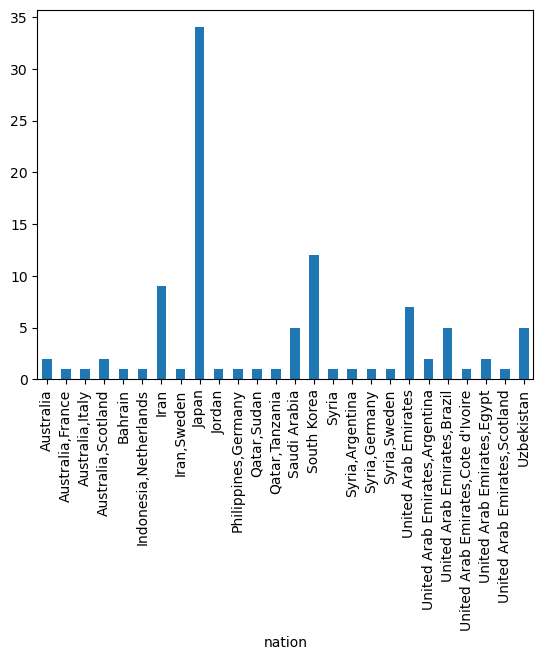

In [9]:
# 1. 3) 이중국적 미분류

df_grouped = df_2.groupby('nation')
df_grouped['name'].count().plot.bar()

<Axes: xlabel='nations'>

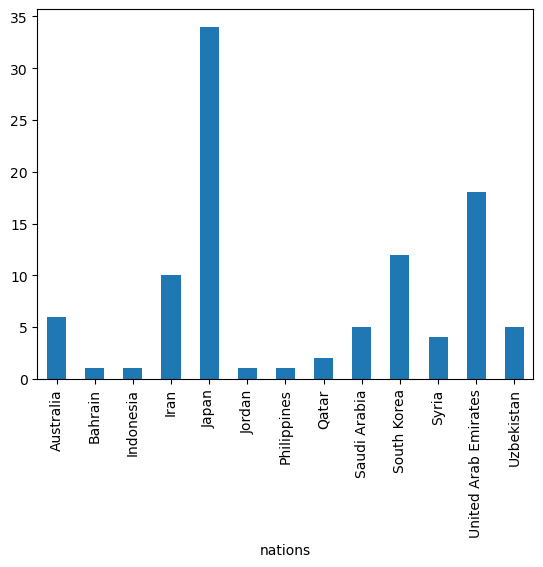

In [10]:
# 1. 3) 이중국적 분류

df_grouped = df_2.groupby('nations')
df_grouped['name'].count().plot.bar()

In [11]:
#1. 4) csv로 저장
df.to_csv('D:/python/pandas/data/afc_top_100.csv')

# 2. 소상공인시장진흥공단_상가(상권)정보_대구_202312.csv

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_store = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_대구_202312.csv', encoding='utf-8')
df_store

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0090318,아보카,NaN,I2,음식,I203,일식,I20301,일식 회/초밥,I56122,...,2729011600110100000000001,NaN,대구광역시 달서구 수밭동길 34,704802,42835,NaN,1,NaN,128.549749,35.795445
1,MA010120220805430943,모텔탑,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,2714014200100370005004100,NaN,대구광역시 동구 파계로138길 40,701500,41001,NaN,NaN,NaN,128.639751,35.992577
2,MA010120220805432876,킴스헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,2723011400106790000009408,대구동서변그린빌,대구광역시 북구 동변로 55,702733,41414,NaN,1,NaN,128.602432,35.916799
3,MA010120220805435697,카페사람이야기,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2714012300110990000000001,NaN,대구광역시 동구 이노밸리로46길 4-9,701290,41067,NaN,1,NaN,128.721839,35.877366
4,MA010120220805435246,다즐링,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2714010200103510034044815,NaN,대구광역시 동구 화랑로 23,701829,41252,NaN,1,NaN,128.631047,35.868657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113634,MA010120220809479663,공원식당,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2729012200119530035032165,NaN,대구광역시 달서구 송현로8길 18,704827,42825,NaN,NaN,NaN,128.549018,35.822606
113635,MA010120220808880885,컴퓨터 학원,NaN,P1,교육,P106,기타 교육,P10627,컴퓨터 학원,P85691,...,2726010100113090000030761,NaN,대구광역시 수성구 들안로 393,706826,42001,NaN,NaN,NaN,128.617942,35.865192
113636,MA010120220803068778,동성F&D,NaN,I2,음식,I210,기타 간이,I21003,피자,I56192,...,2714010100106090014042494,NaN,대구광역시 동구 아양로11길 26,701819,41194,NaN,1,NaN,128.621018,35.884834
113637,MA010120220809507658,수103,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,2729011800101100001009758,NaN,대구광역시 달서구 조암남로 166,704390,42761,NaN,NaN,NaN,128.516825,35.815970


In [14]:
df_store.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
#2. 1) 필요없는 column 제거
df_store.drop(df_store.columns[df_store.columns.str.contains('코드')], axis = 1, inplace=True) # column 중 문자열에 '코드'를 포함하는 경우 drop
df_store.drop(['상가업소번호', '표준산업분류명','대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명', '건물본번지', '건물부번지', '건물관리번호', '건물명','구우편번호', '신우편번호', '동정보', '층정보', '호정보', ], axis=1, inplace=True) # 남은 column 제거
df_store.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '도로명주소', '경도', '위도'],
      dtype='object')

In [16]:
#2. 2) csv로 저장
df_store.to_csv('D:/python/pandas/data/daegu_store_info.csv')

# 3. 햄버거 프랜차이즈 
    2. df_store을 이어서 사용

In [17]:
df_burger = df_store.copy()
df_burger

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,아보카,NaN,음식,일식,일식 회/초밥,대구광역시,달서구,도원동,도원동,대구광역시 달서구 수밭동길 34,128.549749,35.795445
1,모텔탑,NaN,숙박,일반 숙박,여관/모텔,대구광역시,동구,공산동,중대동,대구광역시 동구 파계로138길 40,128.639751,35.992577
2,킴스헤어,NaN,수리·개인,이용·미용,미용실,대구광역시,북구,무태조야동,동변동,대구광역시 북구 동변로 55,128.602432,35.916799
3,카페사람이야기,NaN,음식,비알코올,카페,대구광역시,동구,혁신동,각산동,대구광역시 동구 이노밸리로46길 4-9,128.721839,35.877366
4,다즐링,NaN,음식,비알코올,카페,대구광역시,동구,신천4동,신천동,대구광역시 동구 화랑로 23,128.631047,35.868657
...,...,...,...,...,...,...,...,...,...,...,...,...
113634,공원식당,NaN,음식,한식,백반/한정식,대구광역시,달서구,송현1동,송현동,대구광역시 달서구 송현로8길 18,128.549018,35.822606
113635,컴퓨터 학원,NaN,교육,기타 교육,컴퓨터 학원,대구광역시,수성구,범어3동,범어동,대구광역시 수성구 들안로 393,128.617942,35.865192
113636,동성F&D,NaN,음식,기타 간이,피자,대구광역시,동구,신암1동,신암동,대구광역시 동구 아양로11길 26,128.621018,35.884834
113637,수103,NaN,소매,섬유·의복·신발 소매,여성 의류 소매업,대구광역시,달서구,유천동,유천동,대구광역시 달서구 조암남로 166,128.516825,35.815970


In [18]:
key = '맥도날드|롯데리아|버거킹|맘스터치|노브랜드버거'
df_burger = df_burger.loc[df_burger['상호명'].str.contains(key)].copy() # 제시된 프랜차이즈만 걸러내기

translator = ['맥도날드','롯데리아','버거킹','맘스터치','노브랜드버거'] # column '브랜드명' 생성
for i, name in enumerate(translator):
    df_burger.loc[df_burger['상호명'].str.contains(name), '브랜드명'] = translator[i]
# 3. 1) 각 브래드별 지점수
df_burger['브랜드명'].value_counts() 

브랜드명
맘스터치      66
롯데리아      51
버거킹       21
노브랜드버거    11
맥도날드       6
Name: count, dtype: int64

In [19]:
# 3. 2) 지점수 많은 순으로 정렬
for i in df_burger.index:
    df_burger.loc[i,'브랜드지점수'] = df_burger['브랜드명'].value_counts()[df_burger.loc[i,'브랜드명']]

df_burger_sorted = df_burger.sort_values(by='브랜드지점수', axis=0, ascending=False)
df_burger_sorted.head(3)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명,브랜드지점수
59460,맘스터치두류점,NaN,음식,기타 간이,버거,대구광역시,달서구,두류3동,두류동,대구광역시 달서구 달구벌대로 1728,128.554532,35.856407,맘스터치,66.0
35715,맘스터치북부정류장점,NaN,음식,기타 간이,버거,대구광역시,서구,비산7동,비산동,대구광역시 서구 서대구로 304,128.557188,35.884705,맘스터치,66.0
25121,맘스터치,NaN,음식,기타 간이,버거,대구광역시,수성구,파동,파동,대구광역시 수성구 파동로 123,128.615468,35.814415,맘스터치,66.0


In [20]:
# 3. 3) 각 구별 브랜드 수


table_brand = df_burger_sorted.pivot_table(index="시군구명",columns='브랜드명',
                                values="상호명", aggfunc="count", fill_value=0)
table_brand

브랜드명,노브랜드버거,롯데리아,맘스터치,맥도날드,버거킹
시군구명,,,,,
군위군,0,0,1,0,0
남구,0,4,5,0,2
달서구,2,8,16,2,3
달성군,0,9,7,0,2
동구,4,5,10,0,3
북구,2,8,11,0,5
서구,0,4,3,2,1
수성구,2,8,11,1,3
중구,1,5,2,1,2


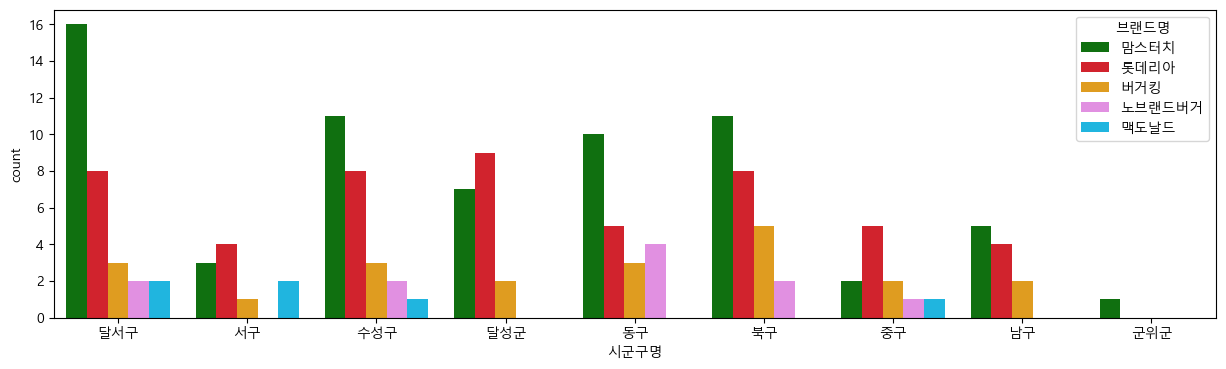

In [21]:
# 3. 4) bar
plt.rc('font', family="Malgun Gothic") # 한글폰트
color_dict = {'맥도날드':'#00C7FF',  '롯데리아':'#EE0613', '버거킹':'orange', '맘스터치':'green', '노브랜드버거':'violet'}
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_burger_sorted, x="시군구명", hue='브랜드명', palette=color_dict)

In [22]:
# 3. 5) 지도
# 아나콘다 power shell에서 pip install folium
import folium

lat = df_burger_sorted['위도'].mean()
long = df_burger_sorted['경도'].mean()

m = folium.Map(location=[lat,long], zoom_start=12, height=800)

for i in df_burger.index:
    row = df_burger.loc[i]
    i_lat = row['위도']
    i_long = row['경도']
    label = row['브랜드명']+' - '+row['도로명주소'][6:] # 도로명 주소앞 '대구광역시 ' 생략
    color = color_dict[row['브랜드명']]
    popup = folium.Popup(label, max_width=150)
    folium.CircleMarker(
        location = [i_lat, i_long],
        radius = 10,
        color = color,
        fill = False,
        fill_opacity = 1, 
        fill_color = color,
        popup = popup
    ).add_to(m)
m